# Liner shock velocity

Code to analyise optical framing images from liner shots.

To get started, run the code in the cell below:

In [30]:
%matplotlib notebook
import numpy as np
from scipy import stats
from SourceCode.OpticalFrames import *

Next, add the shot info, the interframe (in ns) and start time (in ns). This code block loads the optical frame images and displays one of them.

Folder found: //LINNA/Users/Magpie/Documents/MAGPIE data/2016/dec_2016/s1212_16 Exploding Liner
Optical frame folder found: s1212_16 fast frame
Searching: //LINNA/Users/Magpie/Documents/MAGPIE data/2016/dec_2016/s1212_16 Exploding Liner/s1212_16 fast frame/shot
Searching: //LINNA/Users/Magpie/Documents/MAGPIE data/2016/dec_2016/s1212_16 Exploding Liner/s1212_16 fast frame/shot


<IPython.core.display.Javascript object>


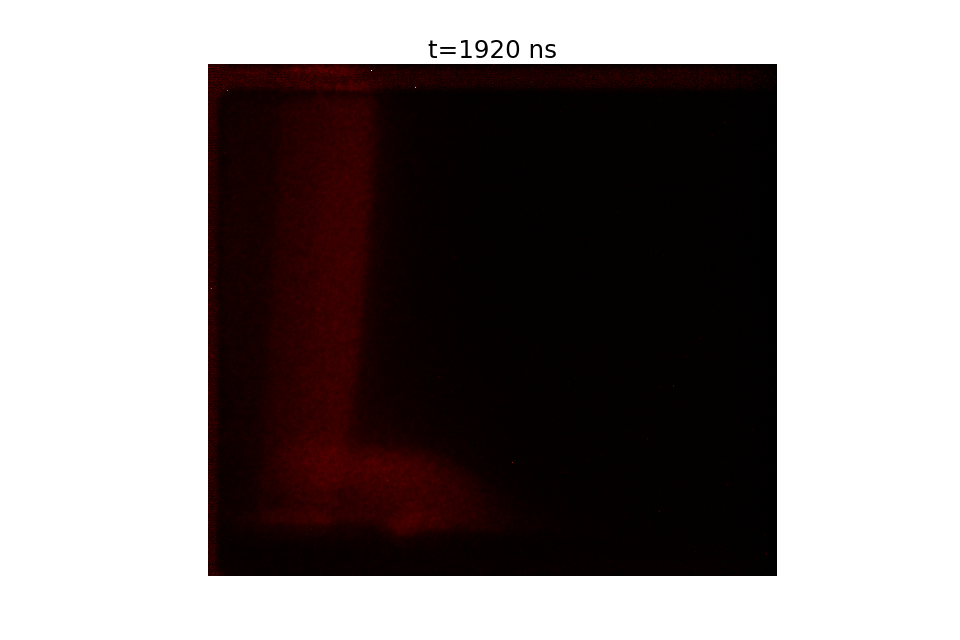

In [31]:
shotName = "s1212_16"
interframe = 40
startTime = 1760
s=OpticalFrames(shotName,startTime,interframe)
s.plot(frame=5)

Use the image above to specify the start coordinate of the liner and the scale.

In [32]:
liner_start_coord = 70; #pixel number
scale = 350/4 #pixels per millimeter

The next code block grabs lineouts from each image.

<IPython.core.display.Javascript object>


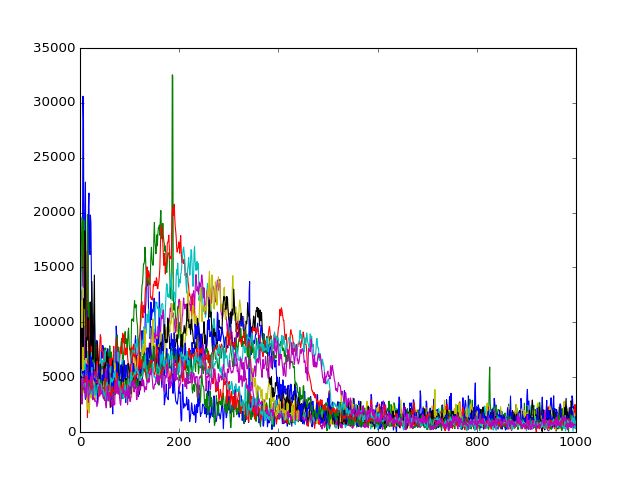

In [33]:
x_start, x_stop = 0, 1000
y_start, y_stop = 300, 300
points = 1000
lines = [1]
i = 0
fig, ax=plt.subplots()
for im in s.get_array():
    x, y = np.linspace(x_start, x_stop, points), np.linspace(y_start, y_stop, points)
    line = im[y.astype(np.int), x.astype(np.int)] #get lineouts along the centre of the image
    lines.append([])
    lines[i] = line
    i = i+1
    ax.plot(line)

The next code block grabs the position of the shock front, defined as the maximum of the peak (ignoring any noise at low x values).

<IPython.core.display.Javascript object>


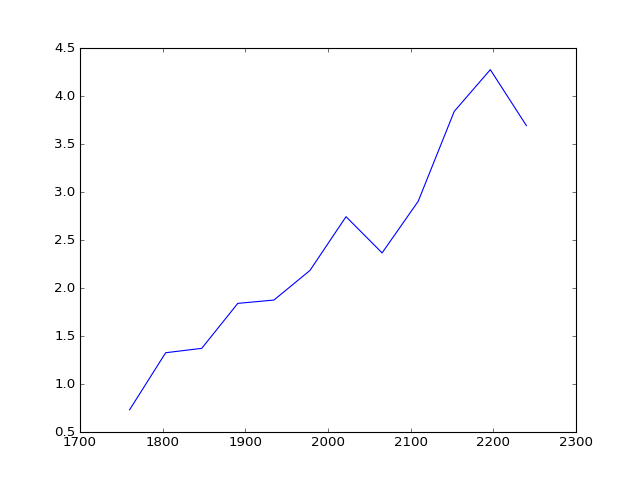

In [34]:
positions = []
start, stop = 100, 1000
for i in range(0,len(lines)-1):
    pixel = np.argmax(lines[i][start:stop]) +start-liner_start_coord
    positions.append( pixel/scale )
times = np.linspace(s.start, s.start+len(positions)*s.IF, len(positions))
fig, ax2 = plt.subplots()
ax2.plot(times,positions)

Determin the shock velocity and start time.

In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(times,positions)
velocity = slope*1000 #defined in km/s
start_time = -intercept/slope
ax2.plot(  )
print("Velocity: "+str(velocity)+" km/s")
print("Start time: "+str(start_time)+" ns")

NameError: name 'ax2' is not defined